In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px     #Whatever graphs we are plotting in seaborn plot it using plotly

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/mscds/laptop_price (2).csv" , encoding = 'latin')
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


#Data Cleaning

In [ ]:
# df.dropna
# df.drop
df.drop(columns = ['laptop_ID','Product'],inplace = True)

In [ ]:
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [ ]:
df.duplicated().sum()

np.int64(29)

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(1274, 11)

In [ ]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
330,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.7kg,1199.0
1004,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.2kg,1195.0
208,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.2kg,1449.0


In [ ]:
# 89.07 INR  >> 1 euro
# 299.0 * 89.07 = INR

In [ ]:
df['Price_euros'] = round(df['Price_euros'] * 89.07).astype('int')

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,119326
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,80069
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,51215
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,226011
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,160647


In [ ]:
df.rename(columns = {'Price_euros':'Price'},inplace = True)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,119326
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,80069
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,51215
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,226011
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,160647


In [ ]:
#Ram Converting from object Col  to Numeric Col
df['Ram'].value_counts()

,count
Ram,
8GB,613
4GB,366
16GB,198
6GB,35
12GB,25
32GB,17
2GB,16
24GB,3
64GB,1


In [ ]:
a = '4GB'
type(a)

str

In [ ]:
a.replace("GB","")

'4'

In [ ]:
#Str formating
name = 'zeeshan'
print(f"My name is {name}")

My name is zeeshan


In [ ]:
print("my name is ",name)

my name is  zeeshan


In [ ]:
(lambda a :a.replace("GB",""))('16GB')

'16'

In [ ]:
df['Ram'] = df['Ram'].apply(lambda a :a.replace("GB","")).astype('int')

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,119326
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,80069
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,51215
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,226011
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,160647


In [ ]:
#EDA
df['Ram'].value_counts()

,count
Ram,
8,613
4,366
16,198
6,35
12,25
32,17
2,16
24,3
64,1


<Axes: xlabel='Ram', ylabel='Price'>

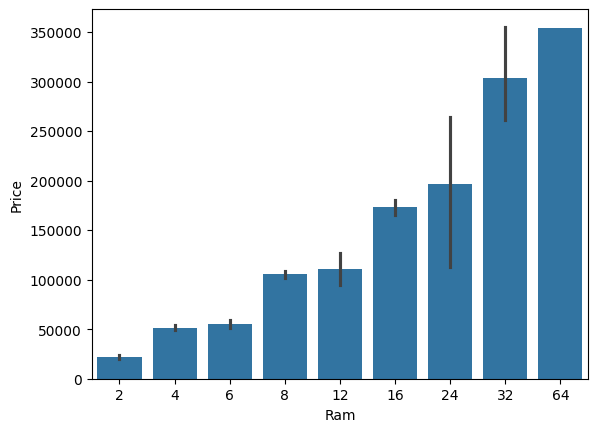

In [ ]:
sns.barplot(x = df['Ram'], y = df['Price'])

#Documentation

In [ ]:
df['Weight'] = df['Weight'].apply(lambda a :a.replace("kg","")).astype(float)

In [ ]:
df['Weight'].value_counts()

,count
Weight,
2.200,119
2.100,58
2.000,45
2.400,42
2.500,38
...,...
0.990,1
2.591,1
2.210,1


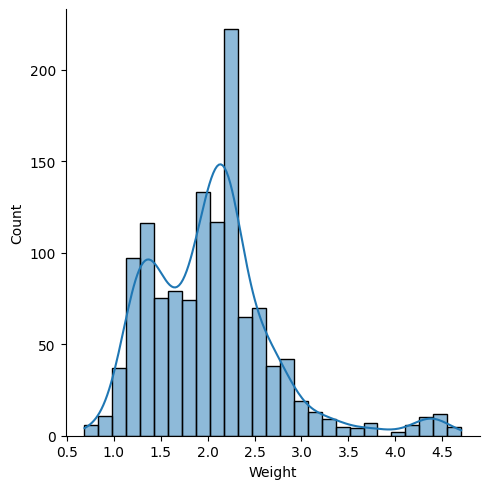

In [ ]:
sns.displot(x = df['Weight'], kde = True)

<Axes: xlabel='Weight', ylabel='Price'>

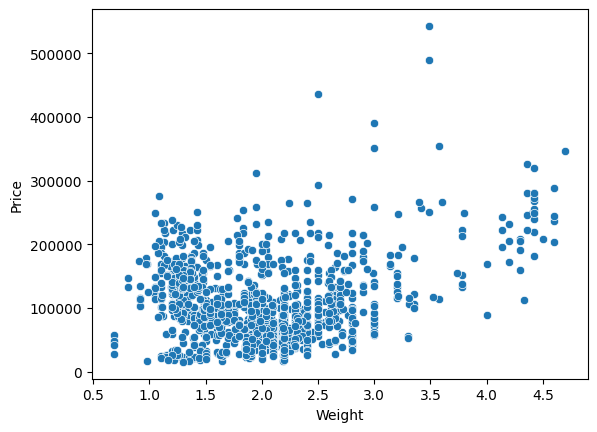

In [ ]:
sns.scatterplot(x = df['Weight'], y = df['Price'])


#Doc

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int64  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float64
 10  Price             1274 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 119.4+ KB


In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1247,Asus,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.34,207088


In [ ]:
df['Company'].value_counts()

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,151
Acer,101
MSI,54
Toshiba,48
Apple,21
Samsung,9


In [ ]:
df.shape   #Before dropping companies

(1274, 11)

In [ ]:
#Filtering for the companies which has repeated more than 10 times in the dataset
df = df[df.groupby('Company')["Company"].transform('count') > 10]

In [ ]:
df['Company'].value_counts()

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,151
Acer,101
MSI,54
Toshiba,48
Apple,21


In [ ]:
df.shape #After dropping companies

(1223, 11)

<Axes: xlabel='Company', ylabel='Price'>

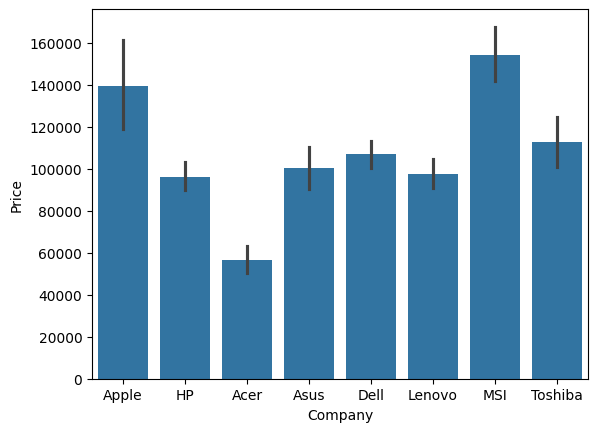

In [ ]:
sns.barplot(x = df['Company'], y = df['Price'])


#Document

In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
765,Acer,Notebook,13.3,1366x768,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.6,58341


In [ ]:
df['TypeName'].value_counts()

,count
TypeName,
Notebook,687
Gaming,200
Ultrabook,171
2 in 1 Convertible,114
Workstation,29
Netbook,22


<Axes: xlabel='TypeName'>

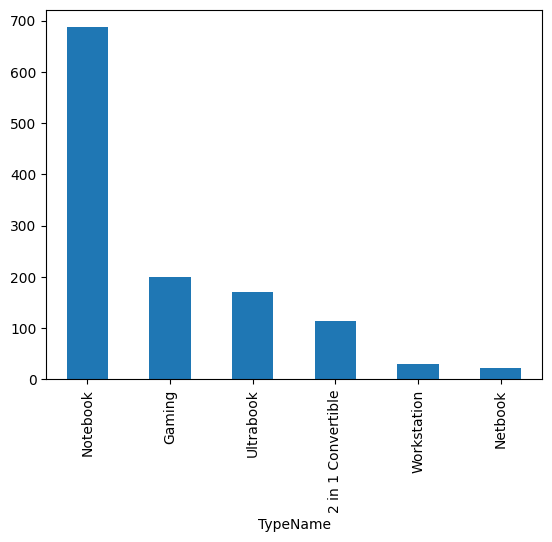

In [ ]:
df['TypeName'].value_counts().plot(kind = 'bar')

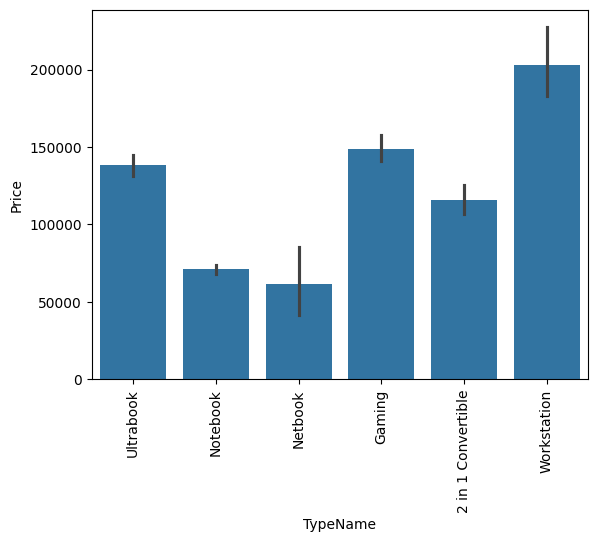

In [ ]:
sns.barplot(x = df['TypeName'], y = df['Price'])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df['Inches'].value_counts()

,count
Inches,
15.6,636
14.0,182
17.3,162
13.3,152
12.5,37
11.6,29
12.0,6
13.9,6
15.4,4


In [ ]:
df = df[df.groupby('Inches')["Inches"].transform('count') > 10]

In [ ]:
df.shape   #After Filtering

(1198, 11)

In [ ]:
df['Inches'].value_counts()

,count
Inches,
15.6,636
14.0,182
17.3,162
13.3,152
12.5,37
11.6,29


<ipython-input-50-89f763ca4b2b>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df['Inches'], y = df['Price'] , palette = 'viridis')


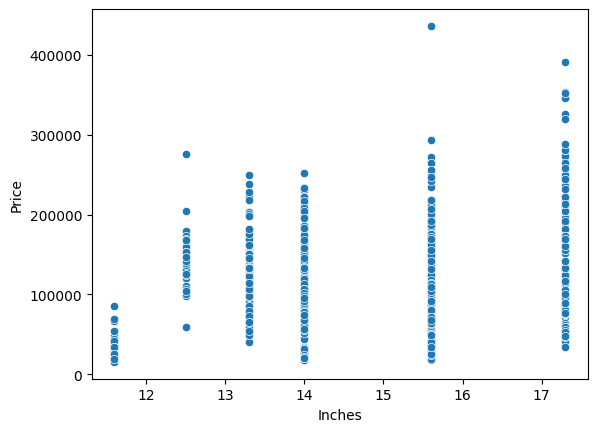

In [ ]:
#Inches vs Price
sns.scatterplot(x = df['Inches'], y = df['Price'] , palette = 'viridis')
plt.show()

<ipython-input-51-0ee6d3890cf5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['Inches'], y = df['Price'] , palette = 'viridis')


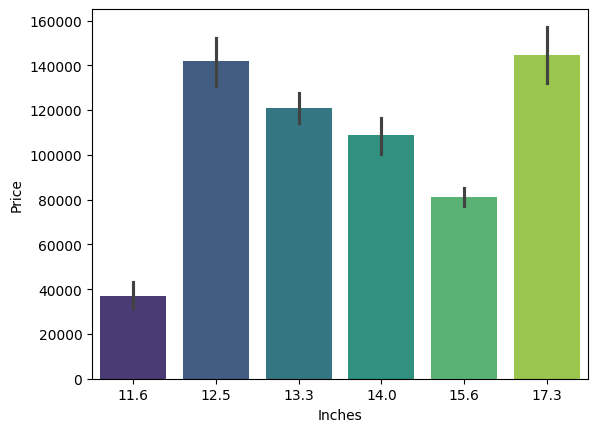

In [ ]:
#Inches vs Price
sns.barplot(x = df['Inches'], y = df['Price'] , palette = 'viridis')
plt.show()

In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1199,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.43,182496


In [ ]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,491
1366x768,256
IPS Panel Full HD 1920x1080,217
Full HD / Touchscreen 1920x1080,44
IPS Panel Full HD / Touchscreen 1920x1080,43
1600x900,22
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [ ]:
a = 'IPS Panel Full HD / Touchscreen 1920x1080'
#X_res = 1920 , Y_res = 1080

In [ ]:
a.split()[-1]

'1920x1080'

In [ ]:
a.split()[-1].split('x')

['1920', '1080']

In [ ]:
a.split()[-1].split('x')[0]   #X_res

'1920'

In [ ]:
a.split()[-1].split('x')[1]   #Y_res

'1080'

In [ ]:
(lambda x : x.split()[-1].split('x')[0])('1920x1080')   #X_res

'1920'

In [ ]:
(lambda x : x.split()[-1].split('x')[1])('1920x1080')   #Y_res

'1080'

In [ ]:
df['X_res'] = df['ScreenResolution'].apply((lambda x : x.split()[-1].split('x')[0])).astype('int')

In [ ]:
df['Y_res'] = df['ScreenResolution'].apply((lambda x : x.split()[-1].split('x')[1])).astype('int')

In [ ]:
def pow(a,b):
  return a**b

In [ ]:
x = lambda a : a**2

In [ ]:
x(2)

4

In [ ]:
pow(2,3)

8

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,119326,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,80069,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51215,1920,1080
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,160647,2560,1600
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,35628,1366,768


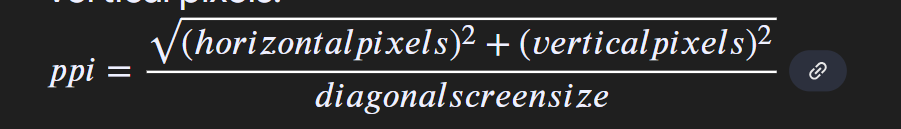

Pixels per inch (PPI) refers to the number of pixels contained within each inch of a digital image. It also refers to the set number of pixels a screen can display. Generally speaking, the higher the PPI, the better the image quality.

In [ ]:
#Add a column for ppi
#X_res
#Y_res
#Inches

df['ppi']  =  round(((df['X_res']**2) + (df['Y_res']**2))**0.5 /df['Inches'],2)

In [ ]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,ppi
442,Lenovo,Ultrabook,12.5,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,127281,1920,1080,176.23
1239,Lenovo,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.40,133516,1920,1080,165.63
412,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,AMD Radeon 520,Windows 10,2.10,41774,1920,1080,141.21
656,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,AMD Radeon 530,Windows 10,2.20,81855,1920,1080,141.21
494,Asus,Gaming,17.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6700HQ 2.6GHz,24,256GB SSD + 1TB HDD,Nvidia GeForce GTX 965M,Windows 10,4.33,113030,1920,1080,127.34


In [ ]:
#Ppi vs Price  Analysis
df['ppi'].value_counts()

,count
ppi,
141.21,419
100.45,194
127.34,131
157.35,122
165.63,100
111.94,42
135.09,28
276.05,25
176.23,25


<Axes: xlabel='ppi', ylabel='Price'>

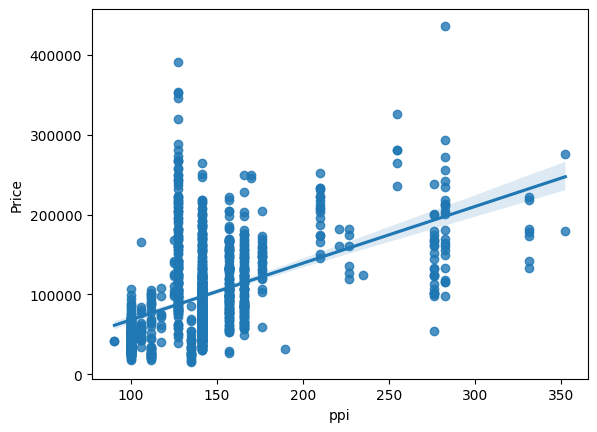

In [ ]:
sns.regplot(x = df['ppi'] , y = df['Price'])

#Interview Question ::>

In [ ]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,491
1366x768,256
IPS Panel Full HD 1920x1080,217
Full HD / Touchscreen 1920x1080,44
IPS Panel Full HD / Touchscreen 1920x1080,43
1600x900,22
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [ ]:
a = 'IPS Panel Full HD / Touchscreen 1920x1080'
#If there is IPS in this str return 1 else 0
(lambda a: 1 if "IPS" in a else 0)(' Panel Full HD IPS / Touchscreen 1920x1080')

1

In [ ]:
df['IPS'] =  df['ScreenResolution'].apply(lambda a: 1 if "IPS" in a else 0)

In [ ]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,ppi,IPS
1135,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,16,1.0TB Hybrid,AMD Radeon R7 M360,Windows 10,2.50,97888,1920,1080,141.21,0
224,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42,218786,1920,1080,127.34,1
923,Toshiba,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,16,256GB SSD,Nvidia GeForce 930M,Windows 10,2.40,175913,1920,1080,141.21,1


In [ ]:
df['Touchscreen'] =  df['ScreenResolution'].apply(lambda a: 1 if "Touchscreen" in a else 0)

<Axes: xlabel='Touchscreen'>

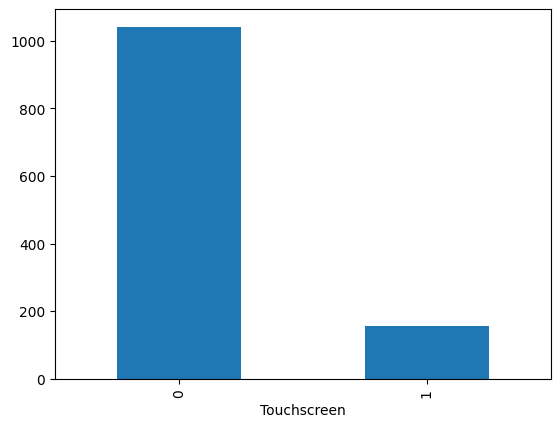

In [ ]:
df['Touchscreen'].value_counts().plot(kind ='bar')

<Axes: xlabel='IPS'>

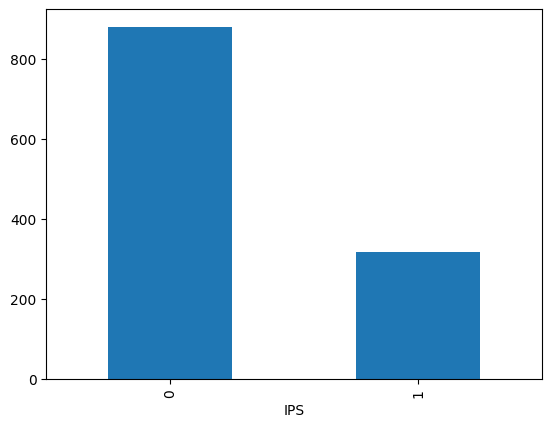

In [ ]:
df['IPS'].value_counts().plot(kind ='bar')

In [ ]:
df.drop(columns = ['ScreenResolution','Inches','X_res','Y_res'],inplace = True)

In [ ]:
df.shape

(1198, 12)

<Axes: xlabel='Cpu'>

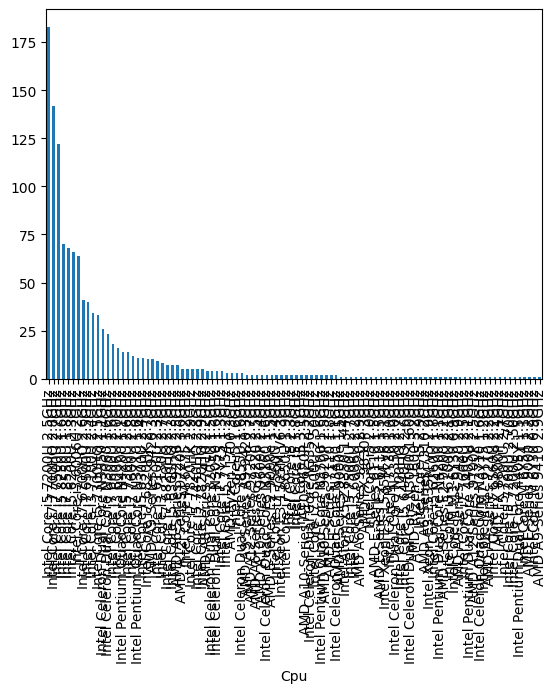

In [ ]:
df['Cpu'].value_counts().plot(kind = 'bar')

In [ ]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,183
Intel Core i7 7700HQ 2.8GHz,142
Intel Core i7 7500U 2.7GHz,122
Intel Core i5 8250U 1.6GHz,70
Intel Core i7 8550U 1.8GHz,68
...,...
Intel Pentium Dual Core 4405Y 1.5GHz,1
Intel Core M 6Y54 1.1GHz,1
AMD E-Series 9000 2.2GHz,1


In [ ]:
a = 'Intel Core i5 7200U 2.5GHz'


In [ ]:
a.split()   #to convert srt into List

['Intel', 'Core', 'i5', '7200U', '2.5GHz']

In [ ]:
a.split()[0:3]

['Intel', 'Core', 'i5']

In [ ]:
" ".join(a.split()[0:3])

'Intel Core i5'

In [ ]:
(lambda a :" ".join(a.split()[0:3]))('AMD E-Series E2-9000 2.2GHz')

'AMD E-Series E2-9000'

In [ ]:
df['Cpu'] = df['Cpu'].apply(lambda a :" ".join(a.split()[0:3]))

In [ ]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i7,483
Intel Core i5,409
Intel Core i3,133
Intel Celeron Dual,64
Intel Pentium Quad,27
AMD A9-Series 9420,11
Intel Core M,10
AMD A6-Series 9220,8
AMD A12-Series 9720P,7


In [ ]:
#Will filter the AMD cpu w.r.t the Series
#AMD A9-Series 9420  >> AMD A-Series
#AMD E-Series 9000   >> AMD E-Series
#AMD FX 8800P        >> AMD F-Series


In [ ]:
def fetch_pro(text):
  if text == 'Intel Core i7' or text =='Intel Core i5' or text == 'Intel Core i3':
    return text
  elif text.split()[0] == 'Intel':
    return "Other Intel Processor"
  else:
    if text[4] == 'E':
      return "AMD E-Series"
    elif text[4] == 'A':
      return "AMD A-Series"
    elif text[4] == 'F':
      return "AMD F-Series"
    else:
      return "AMD Ryzen Series"


In [ ]:
fetch_pro('Intel Core i5')

'Intel Core i5'

In [ ]:
df['Cpu'] = df['Cpu'].apply(fetch_pro)

<Axes: xlabel='Cpu'>

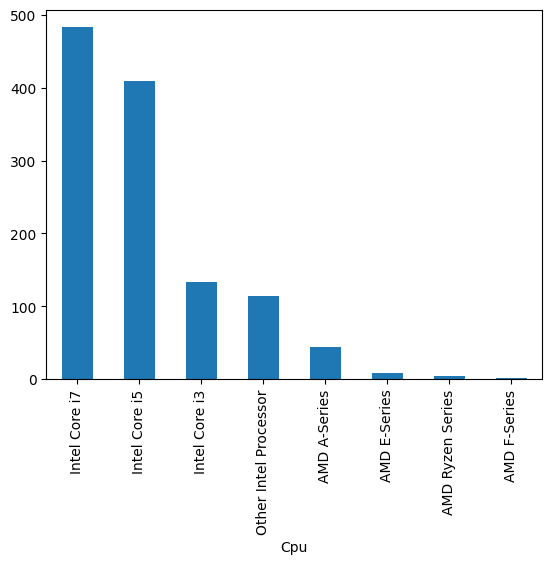

In [ ]:
df['Cpu'].value_counts().plot(kind ='bar')

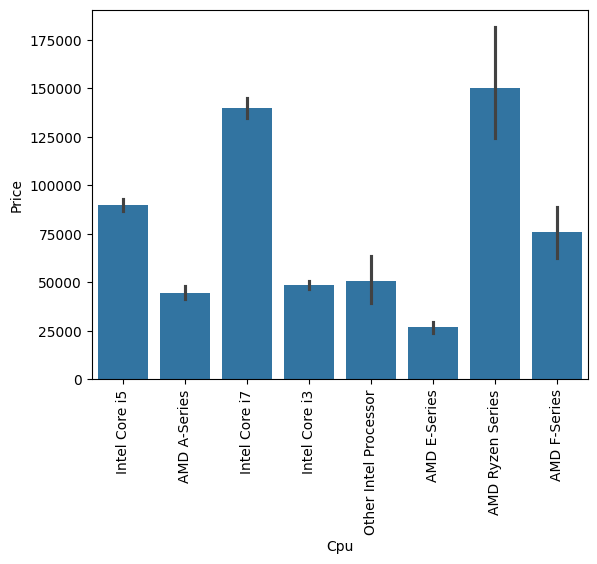

In [ ]:
sns.barplot(x = df['Cpu'] , y = df['Price'])
plt.xticks(rotation = 90)
plt.show()

#doc

In [ ]:
a = 'Intel Celeron Dual'
a.split()[0]

'Intel'

In [ ]:
b = 'AMD E-Series E2-6110'
b[4]

'E'

In [ ]:
df.sample(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,IPS,Touchscreen
1181,Lenovo,Ultrabook,Intel Core i7,6,256GB SSD,Nvidia GeForce 920M,Windows 10,1.54,74017,141.21,0,0
412,HP,Notebook,Intel Core i3,4,1TB HDD,AMD Radeon 520,Windows 10,2.10,41774,141.21,0,0
373,Lenovo,Notebook,AMD A-Series,4,128GB SSD,AMD Radeon R5,Windows 10,2.60,43555,106.11,0,0


In [ ]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,262
Intel HD Graphics 520,179
Nvidia GeForce GTX 1050,65
Intel UHD Graphics 620,64
Nvidia GeForce GTX 1060,45
...,...
AMD Radeon R5 M315,1
Nvidia Quadro M500M,1
AMD Radeon R7 M360,1


<Axes: xlabel='Gpu'>

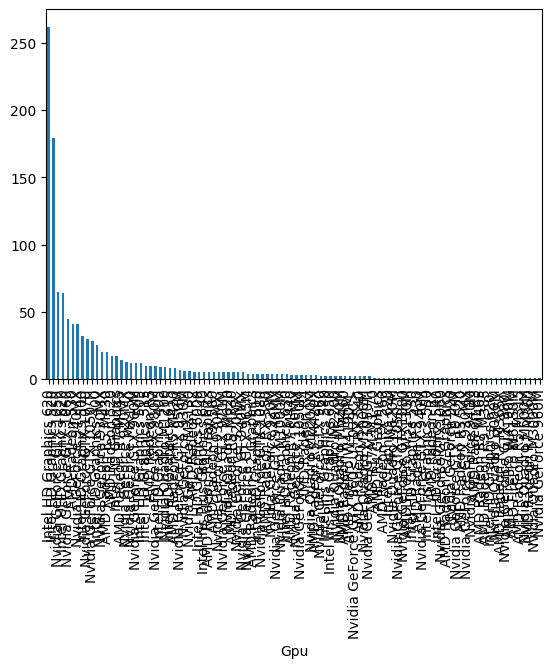

In [ ]:
df['Gpu'].value_counts().plot(kind = 'bar')

In [ ]:
a = 'Intel HD Graphics 620'
a.split()[0:2]

['Intel', 'HD']

In [ ]:
" ".join(a.split()[0:2])

'Intel HD'

In [ ]:
(lambda a:" ".join(a.split()[0:2]))('AMD Radeon R5 520')

'AMD Radeon'

In [ ]:
df['Gpu'] = df['Gpu'].apply(lambda a:" ".join(a.split()[0:2]))

In [ ]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD,570
Nvidia GeForce,353
AMD Radeon,162
Intel UHD,64
Nvidia Quadro,31
Intel Iris,10
AMD FirePro,5
AMD R4,1
AMD R17M-M1-70,1


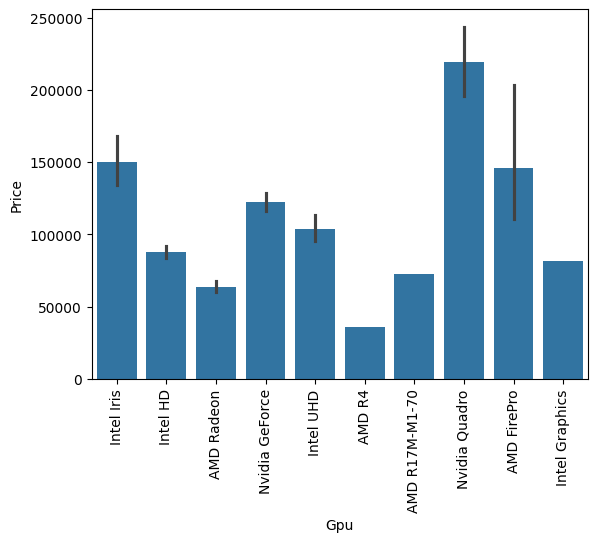

In [ ]:
sns.barplot(x = df['Gpu'] , y = df['Price'])
plt.xticks(rotation = 90)
plt.show()

#Document

In [ ]:
df.sample()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,IPS,Touchscreen
959,Acer,2 in 1 Convertible,Other Intel Processor,4,32GB Flash Storage,Intel HD,Chrome OS,1.25,34648,135.09,1,1


In [ ]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,997
No OS,63
Linux,58
Windows 7,45
Chrome OS,22
macOS,8
Mac OS X,3
Windows 10 S,2


In [ ]:
#Wherever we have Windows 10 or Window 10 S >>> Windows 10
#Windows 7 >> Windows 7
#if we have Mac OS X	or macOS >>  mac OS
#No OS >> No OS
#Linux >> Linux
#Chrome OS >>> Chrome OS

In [ ]:
def os(text):
  if text == 'Windows 10' or text == 'Windows 10 S':
    return 'Windows 10'
  elif text == 'Windows 7':
    return 'Windows 7'
  elif text == 'macOS'  or text == 'Mac OS X':
    return 'mac OS'
  elif text == 'No OS':
    return 'No OS'
  elif text == 'Linux':
    return "Linux"
  else:
    return "Chrome OS"

In [ ]:
os('Windows 10 S')

'Windows 10'

In [ ]:
df['OpSys'] =  df['OpSys'].apply(os)

In [ ]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,999
No OS,63
Linux,58
Windows 7,45
Chrome OS,22
mac OS,11


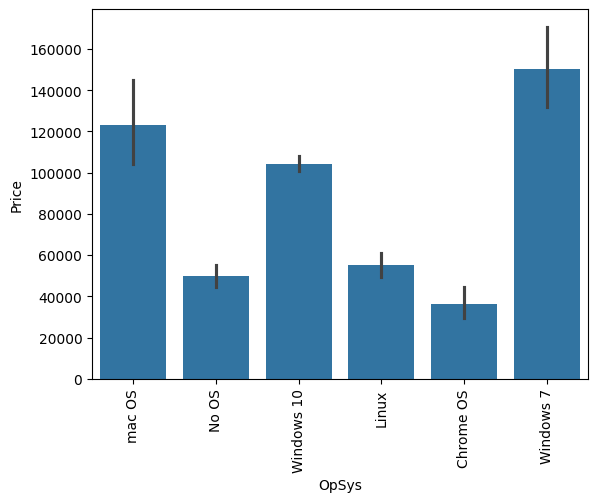

In [ ]:
sns.barplot(x = df['OpSys'] , y = df['Price'])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df[df['OpSys'] == 'Windows 10']['Price'].describe()

,Price
count,999.000000
mean,104300.167167
std,58624.172793
min,17093.000000
25%,60122.000000
50%,92544.000000
75%,133560.500000
max,436354.000000


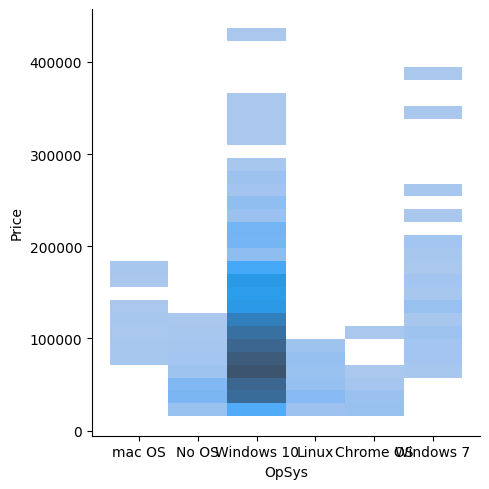

In [ ]:
sns.displot(data = df , x = 'OpSys' , y = 'Price' )

In [ ]:
df.sample(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,IPS,Touchscreen
172,Lenovo,Notebook,AMD A-Series,4,500GB HDD,AMD Radeon,No OS,2.2,27523,100.45,0,0
1262,Dell,Notebook,Intel Core i3,6,1TB HDD,Intel HD,Windows 10,2.3,40883,100.45,0,0
143,Toshiba,Notebook,Intel Core i5,4,500GB HDD,Intel HD,Windows 10,2.1,53620,100.45,0,0


In [ ]:
#Flash Storage
#SDD
#HDD
#Hybrid
df['Memory'].value_counts()

,count
Memory,
256GB SSD,387
1TB HDD,213
500GB HDD,122
512GB SSD,99
128GB SSD + 1TB HDD,93
256GB SSD + 1TB HDD,73
128GB SSD,71
32GB Flash Storage,28
2TB HDD,16


In [ ]:
df['Memory'].str.split('+',n=1,expand=True).sample(5)

,0,1
935,256GB SSD,None
9,256GB SSD,None
523,128GB SSD,None
412,1TB HDD,None
359,256GB SSD,None


In [ ]:
# SSD
# HDD
# Hybrid
# Flash Storage
new=df['Memory'].str.split('+',n=1,expand=True)
df['first']=new[0]
df['first']=df['first'].str.strip()
df['second']=new[1]

df['Layer1HDD']=df['first'].apply(lambda x:1 if "HDD" in x else 0) #
df['Layer1SSD']=df['first'].apply(lambda x:1 if "SSD" in x else 0)
df['Layer1Hybrid']=df['first'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Layer1Flash_Storage']=df['first'].apply(lambda x:1 if "Flash Storage" in x else 0)

df['first']=df['first'].str.replace(r'\D','',regex=True)

df['second'].fillna("0",inplace=True)

df['second']=df['second'].str.strip()
df['Layer2HDD']=df['second'].apply(lambda x:1 if "HDD" in x else 0)
df['Layer2SSD']=df['second'].apply(lambda x:1 if "SSD" in x else 0)
df['Layer2Hybrid']=df['second'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Layer2Flash_Storage']=df['second'].apply(lambda x:1 if "Flash Storage" in x else 0)

df['second']=df['second'].str.replace(r'\D','',regex=True)

df['first']=df['first'].astype('int')
df['second']=df['second'].astype('int')

df['HDD']=df['first']*df['Layer1HDD']+df['second']*df['Layer2HDD']

df['SSD']=df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD']

df['Hybrid']=df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid']

df['Flash_Storage']=df['first']*df['Layer1Flash_Storage']+df['second']*df['Layer2Flash_Storage']

df.drop(columns=['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage',
                 'Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'],inplace=True)

<ipython-input-120-ec09e9c49f89>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['second'].fillna("0",inplace=True)


In [ ]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,IPS,Touchscreen,HDD,SSD,Hybrid,Flash_Storage
327,Asus,Ultrabook,Intel Core i7,8,256GB SSD,Nvidia GeForce,Windows 10,1.70,93515,141.21,0,0,0,256,0,0
576,Toshiba,Ultrabook,Intel Core i7,16,512GB SSD,Intel HD,Windows 10,1.24,166116,157.35,0,1,0,512,0,0
121,MSI,Gaming,Intel Core i7,16,256GB SSD + 2TB HDD,Nvidia GeForce,Windows 10,1.80,199650,141.21,0,0,2,256,0,0
848,HP,2 in 1 Convertible,Intel Core i5,8,256GB SSD,Intel HD,Windows 10,1.28,202812,165.63,0,1,0,256,0,0
608,Lenovo,2 in 1 Convertible,Intel Core i7,8,256GB SSD,Intel HD,Windows 10,2.00,115702,141.21,1,1,0,256,0,0


In [ ]:

df.to_csv("Cleaned.csv")

In [ ]:
df.sample()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,IPS,Touchscreen,HDD,SSD,Hybrid,Flash_Storage
531,Toshiba,Notebook,Intel Core i5,8,500GB HDD,Intel HD,Windows 10,2.0,76600,141.21,1,0,500,0,0,0


In [ ]:
['Company','TypeName','Cpu','Gpu','OpSys']
['Ram','Weight','Touchscreen','IPS','ppi']

['Ram', 'Weight', 'Touchscreen', 'IPS', 'ppi']

In [ ]:
df.drop(columns = ['Memory'],inplace = True )

#Machine Learning

In [ ]:
df.sample()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,ppi,IPS,Touchscreen,HDD,SSD,Hybrid,Flash_Storage
435,Asus,Gaming,AMD Ryzen Series,8,AMD Radeon,Windows 10,3.2,150974,127.34,0,0,1,256,0,0


In [ ]:
df.shape

(1198, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1198 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1198 non-null   object 
 1   TypeName       1198 non-null   object 
 2   Cpu            1198 non-null   object 
 3   Ram            1198 non-null   int64  
 4   Gpu            1198 non-null   object 
 5   OpSys          1198 non-null   object 
 6   Weight         1198 non-null   float64
 7   Price          1198 non-null   int64  
 8   ppi            1198 non-null   float64
 9   IPS            1198 non-null   int64  
 10  Touchscreen    1198 non-null   int64  
 11  HDD            1198 non-null   int64  
 12  SSD            1198 non-null   int64  
 13  Hybrid         1198 non-null   int64  
 14  Flash_Storage  1198 non-null   int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 149.8+ KB


In [ ]:
#Human Lang >> Mach Lang >> Using One Hot Encoder
df['Company']

,Company
0,Apple
1,Apple
2,HP
4,Apple
5,Acer
...,...
1269,Asus
1270,Lenovo
1271,Lenovo
1272,Lenovo


In [ ]:
# 1.Input and output columns
X = df.drop(columns = ['Price']) #Input cols

In [ ]:
#o/p
y = df['Price']

In [ ]:
df.shape

(1198, 15)

In [ ]:
1198 * 0.8

958.4000000000001

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y ,test_size = 0.2  , random_state = 42 )  #Data spliting 80% :: 20% >>testing data = validation data

In [ ]:
X_train

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,ppi,IPS,Touchscreen,HDD,SSD,Hybrid,Flash_Storage
352,MSI,Gaming,Intel Core i7,8,Nvidia GeForce,Windows 10,2.70,127.34,0,0,1,128,0,0
433,Lenovo,Workstation,Intel Core i7,16,Nvidia GeForce,Windows 10,2.30,282.42,1,0,0,512,0,0
85,Dell,Gaming,Intel Core i7,16,Nvidia GeForce,Windows 10,2.65,141.21,1,0,1,128,0,0
928,Dell,Notebook,Intel Core i5,4,Intel HD,Windows 10,2.18,100.45,0,0,1,0,0,0
148,MSI,Gaming,Intel Core i7,16,Nvidia GeForce,Windows 10,2.90,127.34,0,0,1,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,Dell,Notebook,Intel Core i5,4,AMD Radeon,Windows 7,2.24,100.45,0,0,500,0,0,0
1166,Lenovo,Notebook,Intel Core i5,8,Intel HD,Windows 10,1.95,141.21,1,0,0,256,0,0
1203,Dell,Ultrabook,Intel Core i7,16,Intel HD,Windows 10,1.20,276.05,0,1,0,512,0,0
922,HP,Ultrabook,Intel Core i7,8,Intel HD,Windows 10,1.39,276.05,0,1,0,256,0,0


In [ ]:
y_train

,Price
352,125500
433,217776
85,120155
928,63067
148,180723
...,...
1111,68508
1166,123807
1203,238708
922,102341


In [ ]:
X_test

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,ppi,IPS,Touchscreen,HDD,SSD,Hybrid,Flash_Storage
1252,Lenovo,Notebook,Intel Core i3,6,Nvidia GeForce,Windows 10,2.40,141.21,0,0,0,128,0,0
1080,Lenovo,Ultrabook,Other Intel Processor,8,Intel HD,Windows 10,0.99,234.98,1,1,0,512,0,0
111,Dell,Ultrabook,Intel Core i7,8,Intel Iris,Windows 10,1.23,276.05,0,1,0,256,0,0
467,Dell,Notebook,Intel Core i5,8,AMD Radeon,Windows 10,2.02,141.21,0,0,2,0,0,0
65,Asus,Ultrabook,Intel Core i7,16,Nvidia GeForce,Windows 10,1.80,141.21,0,0,0,512,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,Acer,Notebook,Intel Core i7,8,Nvidia GeForce,Linux,2.50,141.21,0,0,0,256,0,0
927,HP,Notebook,Intel Core i5,8,Intel HD,Windows 10,2.31,141.21,0,0,0,256,0,0
578,MSI,Gaming,Intel Core i7,16,Nvidia GeForce,Windows 10,4.14,127.34,0,0,1,512,0,0
1267,Dell,Notebook,Intel Core i7,8,AMD Radeon,Linux,2.30,100.45,0,0,1,0,0,0


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error , mean_squared_error

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor
# from xgboost import XGBRegressor

In [ ]:
df.sample()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,ppi,IPS,Touchscreen,HDD,SSD,Hybrid,Flash_Storage
262,HP,Notebook,Intel Core i5,4,Intel HD,Windows 10,2.1,64309,141.21,1,0,500,0,0,0


In [ ]:
#Linear Regression

categorical_features = ['Company','TypeName','Cpu','Gpu', 'OpSys']

step1 = ColumnTransformer(transformers= [
    ('col_tnf',OneHotEncoder(sparse_output = False ,drop='first'),categorical_features)

    ],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([('step1',step1),('step2',step2)])   #Connecting steps

pipe.fit(X_train,y_train)   #Training ML Model

y_pred = pipe.predict(X_test) #Model Predictions

print("R2_Score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))


R2_Score 0.7975975376601037
MAE 20264.583896485103
MSE 757156954.9600414


In [ ]:
y_pred = pipe.predict(X_test) #Model Predictions

In [ ]:
y_test  #Actual Predictions

,Price
1252,50681
1080,124609
111,122828
467,67604
65,176626
...,...
403,78293
927,103767
578,243072
1267,71790


In [ ]:
#KNeighborsRegressor

step1 = ColumnTransformer(transformers= [
    ('col_tnf',OneHotEncoder(sparse_output = False ,drop='first'),categorical_features)

    ],remainder='passthrough')

step2 = KNeighborsRegressor()

pipe = Pipeline([('step1',step1),('step2',step2)])   #Connecting steps

pipe.fit(X_train,y_train)   #Training ML Model

y_pred = pipe.predict(X_test) #Model Predictions

print("R2_Score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))

R2_Score 0.6877190766447142
MAE 21677.936666666665
MSE 1168195635.0053332


In [ ]:
#DecisionTreeRegressor

step1 = ColumnTransformer(transformers= [
    ('col_tnf',OneHotEncoder(sparse_output = False ,drop='first'),categorical_features)

    ],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=10)

pipe = Pipeline([('step1',step1),('step2',step2)])   #Connecting steps

pipe.fit(X_train,y_train)   #Training ML Model

y_pred = pipe.predict(X_test) #Model Predictions

print("R2_Score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))

R2_Score 0.6997981689500672
MAE 21124.741183892133
MSE 1123009580.2366726


In [ ]:
#RandomForestRegressor

step1 = ColumnTransformer(transformers= [
    ('col_tnf',OneHotEncoder(sparse_output = False ,drop='first'),categorical_features)

    ],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=150 , max_depth=8)

pipe = Pipeline([('step1',step1),('step2',step2)])   #Connecting steps

pipe.fit(X_train,y_train)   #Training ML Model

y_pred = pipe.predict(X_test) #Model Predictions

print("R2_Score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))

R2_Score 0.785852951466822
MAE 18551.53704469336
MSE 801091673.0290222


In [ ]:
#AdaBoostRegressor


step1 = ColumnTransformer(transformers= [
    ('col_tnf',OneHotEncoder(sparse_output = False ,drop='first'),categorical_features)

    ],remainder='passthrough')

step2 = AdaBoostRegressor()

pipe = Pipeline([('step1',step1),('step2',step2)])   #Connecting steps

pipe.fit(X_train,y_train)   #Training ML Model

y_pred = pipe.predict(X_test) #Model Predictions

print("R2_Score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))

R2_Score 0.686171219409133
MAE 26727.925017049587
MSE 1173985934.479247


In [ ]:
# import sklearn

In [ ]:
# sklearn. __version__

In [ ]:
# !pip uninstall -y scikit-learn
# !pip install scikit-learn==1.5.2

In [ ]:
# #XGBRegressor

# step1 = ColumnTransformer(transformers= [
#     ('col_tnf',OneHotEncoder(sparse_output = False ,drop='first'),[0,1,2,4,5])

#     ],remainder='passthrough')

# step2 = XGBRegressor()

# pipe = Pipeline([('step1',step1),('step2',step2)])   #Connecting steps

# pipe.fit(X_train,y_train)   #Training ML Model

# y_pred = pipe.predict(X_test) #Model Predictions

# print("R2_Score",r2_score(y_test,y_pred))
# print("MAE",mean_absolute_error(y_test,y_pred))
# print("MSE",mean_squared_error(y_test,y_pred))

In [ ]:
df.shape

(1198, 15)

In [ ]:
#File Handling
# 4 mode >>>> w-mode , r-mode  , wb-mode  , rb-mode
#Pickle

#Pickling , Unpickling

In [ ]:
df

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,ppi,IPS,Touchscreen,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,Intel Core i5,8,Intel Iris,mac OS,1.37,119326,226.98,1,0,0,128,0,0
1,Apple,Ultrabook,Intel Core i5,8,Intel HD,mac OS,1.34,80069,127.68,0,0,0,0,0,128
2,HP,Notebook,Intel Core i5,8,Intel HD,No OS,1.86,51215,141.21,0,0,0,256,0,0
4,Apple,Ultrabook,Intel Core i5,8,Intel Iris,mac OS,1.37,160647,226.98,1,0,0,256,0,0
5,Acer,Notebook,AMD A-Series,4,AMD Radeon,Windows 10,2.10,35628,100.45,0,0,500,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,Intel Core i7,4,Nvidia GeForce,Windows 10,2.20,64159,100.45,0,0,500,0,0,0
1270,Lenovo,2 in 1 Convertible,Intel Core i7,4,Intel HD,Windows 10,1.80,56827,157.35,1,1,0,128,0,0
1271,Lenovo,2 in 1 Convertible,Intel Core i7,16,Intel HD,Windows 10,1.30,133516,276.05,1,1,0,512,0,0
1272,Lenovo,Notebook,Other Intel Processor,2,Intel HD,Windows 10,1.50,20397,111.94,0,0,0,0,0,64


In [ ]:
import pickle

In [ ]:
pickle.dump(df,open('dataframe.pkl','wb'))

In [ ]:
pickle.dump(pipe,open('pipe_model.pkl','wb'))

In [ ]:
df.sample()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,ppi,IPS,Touchscreen,HDD,SSD,Hybrid,Flash_Storage
1046,HP,Notebook,Intel Core i5,8,Intel HD,Windows 7,1.43,130844,157.35,0,0,0,256,0,0


In [ ]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'MSI', 'Toshiba'],
      dtype=object)

In [ ]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [ ]:
#min()  / max()  wrt weight of laptop
df.describe()


,Ram,Weight,Price,ppi,IPS,Touchscreen,HDD,SSD,Hybrid,Flash_Storage
count,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000
mean,8.377295,2.076120,99714.850584,144.508331,0.265442,0.131052,52.251252,171.854758,0.499165,2.697830
std,4.994689,0.655065,59384.904889,40.948535,0.441753,0.337598,152.249178,161.277411,14.700164,19.245948
min,2.000000,0.910000,15498.000000,90.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.600000,54622.250000,127.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,2.065000,87200.000000,141.210000,0.000000,0.000000,0.000000,154.000000,0.000000,0.000000
75%,8.000000,2.330000,131249.000000,157.350000,1.000000,0.000000,1.000000,256.000000,0.000000,0.000000
max,64.000000,4.700000,436354.000000,352.470000,1.000000,1.000000,500.000000,1024.000000,508.000000,256.000000


In [ ]:
screen_resolution = "2560x1600"

In [ ]:
int(screen_resolution.split('x')[1])

1600

In [ ]:
df.sample()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,ppi,IPS,Touchscreen,HDD,SSD,Hybrid,Flash_Storage
122,Lenovo,Notebook,Intel Core i5,8,Nvidia GeForce,No OS,2.2,56025,141.21,0,0,0,256,0,0


In [ ]:
df.shape

(1198, 15)

In [ ]:
df['HDD'].unique()

array([  0, 500,   1,   2, 128,  10])

In [ ]:
df['SSD'].value_counts()

,count
SSD,
256,473
0,412
128,166
512,118
1,14
180,5
16,3
32,2
64,1


In [ ]:
df['Hybrid'].value_counts()

,count
Hybrid,
0,1188
10,9
508,1


In [ ]:
df['Flash_Storage'].value_counts()

,count
Flash_Storage,
0,1148
32,28
64,7
16,6
256,5
128,4
